# 第一次数值实验

* **姓名**：张三
* **学号**：201900000
* **班级**：信计二班

## 一、数学模型

考虑如下两点边值问题的数学模型
$$
\begin{cases}
- u_{xx} = f,\quad x\in I \\
u(a) = \alpha ,~~~~u(b) =\beta
\end{cases}
$$
其中 $I=(a,b)$ ($a<b$), $f$ 为 $\bar{I}=[a, b]$上的连续函数，$\alpha$,$\beta$ 为给定常数.

## 二、算法设计

$$
\boldsymbol A = 
\begin{bmatrix}
1      & 0      & 0      &\cdots    &\cdots    &\cdots    &0  \\
 -\frac{1}{h^2} &\frac{2}{h^2}  & -\frac{1}{h^2}    &0      &\cdots    &\cdots    &\vdots\\
0& -\frac{1}{h^2} & \frac{2}{h^2} &-\frac{1}{h^2}   &0        &\cdots    &\cdots\\
 \vdots  &\ddots   &\ddots   &\ddots    &\ddots    &\ddots    &\vdots\\ 
 \vdots  &\cdots   &0  &-\frac{1}{h^2} &\frac{2}{h^2} &-\frac{1}{h^2} &0\\
 \vdots  &\cdots   &\cdots   &0        &-\frac{1}{h^2} &\frac{2}{h^2} &-\frac{1}{h^2}\\
0 &\cdots   &\cdots   &\cdots    &0        &0        &1
\end{bmatrix},\quad
\boldsymbol u =
\begin{bmatrix}
u_0  &\\ 
u_1  &\\
\vdots& \\
u_{n-1}&\\
u_n &\\
\end{bmatrix},\quad
\boldsymbol f =
\begin{bmatrix}
\alpha \\
f(x_1)\\
f(x_2)\\
\vdots \\
f(x_{n-1})\\
\beta\\
\end{bmatrix}
$$

## 三、程序实现

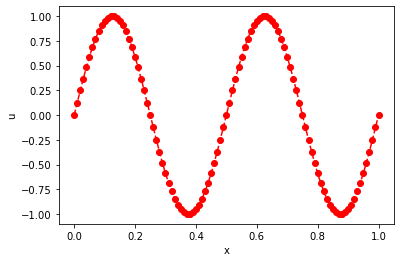

In [15]:
import numpy as np
from scipy.sparse import csr_matrix,diags
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt

def fd1d(N, f, a, b, ua, ub):
    h = (b - a)/N
    x = np.linspace(a, b, N+1)
    c0 = -1/h/h
    c1 = 2/h/h
    d0 = np.ones(N+1, dtype=np.float64)
    d0[1:-1] = c1
    d1 = np.zeros(N, dtype=np.float64)
    d1[1:] = c0
    d2 = np.zeros(N, dtype=np.float64)
    d2[0:-1] = c0
    n = N + 1
    A = diags([d0, d1, d2],
              [0, 1, -1], 
              shape=(n, n),
             format='csr')
    F = f(x)
    F[0] = ua
    F[-1] = ub
    uh = spsolve(A, F)
    return x, uh

def f(x):
    pi = np.pi
    val = 16*pi**2*np.sin(4*pi*x)
    return val

def u(x):
    pi = np.pi
    val = np.sin(4*pi*x)
    return val

a = 0
b = 1
ua = u(a)
ub = u(b)
N = 100
x, uh = fd1d(N, f, a, b, ua, ub)

plt.plot(x,uh,color='r',marker='o',linestyle='dashed')
plt.xlabel('x')
plt.ylabel('u')
plt.show()

In [ ]:
import numpy as np
a = np.ones(4, dtype=np.float64)
print(a)
x = np.linspace(0, 1, 5)
print(x)

In [7]:
from scipy.sparse import csr_matrix,diags
diagonals = [[1, 2, 3, 4], [1, 2, 3], [1, 2]]
A = diags(diagonals, [0, -1, 2]).toarray()
print(A)

[[1. 0. 1. 0.]
 [1. 2. 0. 2.]
 [0. 2. 3. 0.]
 [0. 0. 3. 4.]]


## 四、数值实验

A=\begin{pmatrix} 0 & 0 & 0 & 10 \\ 21 & 0 & 33 & 0 \\ 0 & 0 & 3 & 0 \\ 12 & 1 & 0 & 4 \end{pmatrix} 